# Lotka_Volterra (4 state)

{func}`.Lotka_Volterra_4State`

The Lotka-Volterra model with four states and three parameters
{cite}`Lotka1920`, is explained by the following three equations.

$$\begin{aligned}
\frac{da}{dt} &= k_{0} a x \\
\frac{dx}{dt} &= k_{0} a x - k_{1} x y \\
\frac{dy}{dt} &= k_{1} x y - k_{2} y \\
\frac{db}{dt} &= k_{2} y.
\end{aligned}$$

First, we show the deterministic approach. Then we also show the
different process path using the parameters from {cite}`Press2007`. Note
that although the model is defined in {class}`common_models`, it is based on
outputting an {func}`.OperateOdeModel` rather than {func}`.SimulateOdeModel`.

#TODO why is the predefined version not used?

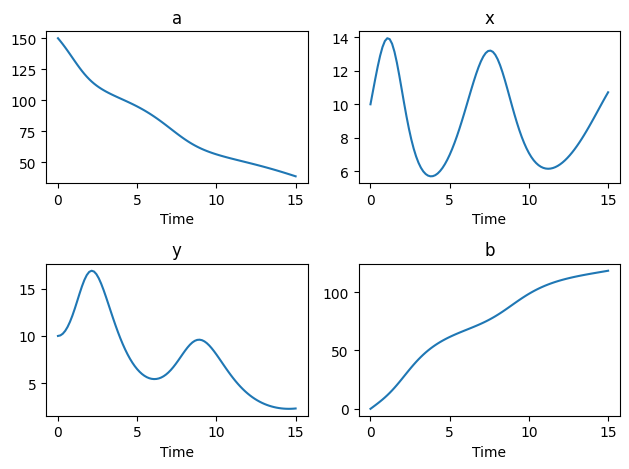

In [1]:
import matplotlib.pyplot as plt

from pygom import Transition, TransitionType, ode_utils, SimulateOde

import numpy

stateList = ['a', 'x', 'y', 'b']

paramList = ['k0', 'k1', 'k2']

transitionList = [Transition(origin='a', destination='x', equation='k0*a*x', transition_type=TransitionType.T), 
                  Transition(origin='x', destination='y', equation='k1*x*y', transition_type=TransitionType.T),Transition(origin='y', destination='b', equation='k2*y', transition_type=TransitionType.T)]

ode = SimulateOde(stateList, paramList, transition=transitionList)

x0 = [150.0, 10.0, 10.0, 0.0]

t = numpy.linspace(0, 15, 100)

ode.initial_values = (x0, t[0])

ode.parameters = [0.01, 0.1, 1.0]

solution = ode.integrate(t[1::])

ode.plot()


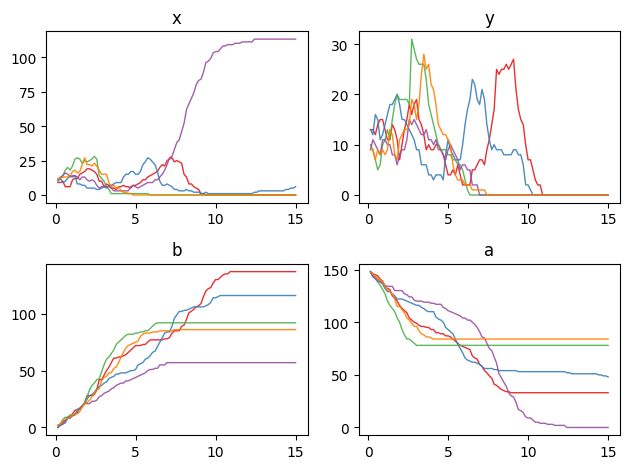

In [2]:
simX, simT = ode.simulate_jump(t[1::], 5, full_output=True)

ode.plot(simX, simT)